# **Understanding Conv2 class**

* **Basic concepts learnt from: A Deep understanding of Deep Learning (with Python intro) - Mark X Cohen (Udemy) - https://www.udemy.com/course/deeplearning_x**

In [26]:
import torch as tr
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# create a conv2d class instance with parameters

# parameters
inChans=3   # RGB
outChans=15
krnSize=5   # should be a odd number
stride=1
padding=0

# create the instance (cf nn.linear)
c=nn.Conv2d(inChans,outChans,krnSize,stride,padding)

print(c)
print()

# check out its weight tensor; what are the dimensions?
print(f"Size of weights: {c.weight.shape}")
print(f"Size of bias: {c.bias.shape}")




Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


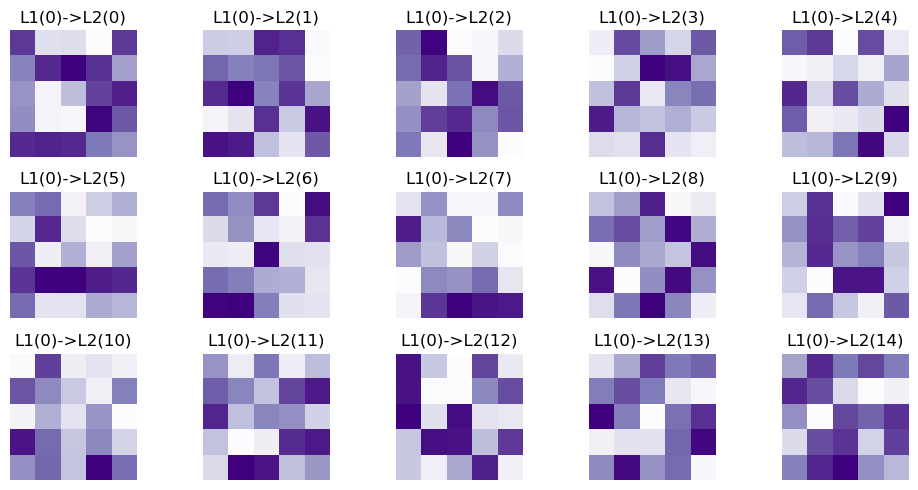

In [28]:
# What do the kernels look like?
fig,axs=plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(tr.squeeze(c.weight[i,0,:,:].detach()),cmap='Purples')
    ax.set_title(f'L1(0)->L2({i})')
    ax.axis('off')
plt.tight_layout()
plt.show()

**Convolve with an image**

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


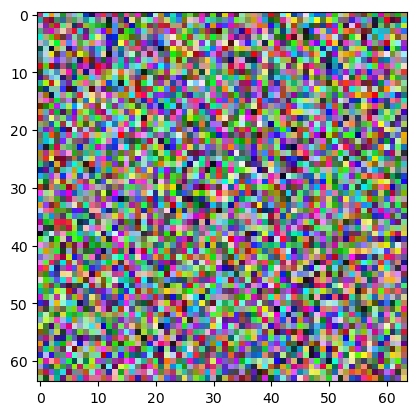

In [29]:
# size of the image (N,RGB,width,height)
imsize=(1,3,64,64)
img=tr.rand(imsize)

# pytorch wants channels first but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view=img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))
plt.show()

In [30]:
# convolve the image with the filter bank (set of 'outchans' kernels)
convRes=c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


In [31]:
# importance of detach() --> to remove grad_fn
tr.squeeze(convRes[0,i,:,:])

tensor([[ 0.1313,  0.5301,  0.3929,  ...,  0.2012,  0.2103,  0.1832],
        [ 0.2123,  0.0368,  0.2885,  ...,  0.2957,  0.1136,  0.4003],
        [-0.0033,  0.1580,  0.3272,  ...,  0.0742,  0.1017,  0.2133],
        ...,
        [ 0.0393, -0.0415,  0.4944,  ...,  0.3108,  0.0085,  0.5873],
        [ 0.1082,  0.2381,  0.0097,  ...,  0.2182,  0.2386,  0.2232],
        [ 0.0987,  0.3877,  0.1292,  ...,  0.1317,  0.2969,  0.3507]],
       grad_fn=<SqueezeBackward0>)

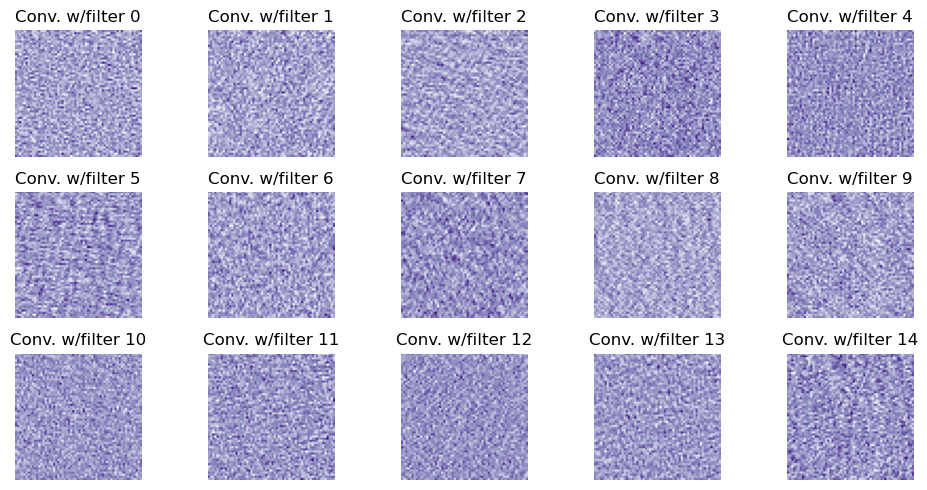

In [32]:
# what do the convolved images look like ?
fig,axs=plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    # extract this "layer" of the convolution result
    I=tr.squeeze(convRes[0,i,:,:]).detach()

    # and visualize it
    ax.imshow(I,cmap="Purples")
    ax.set_title(f'Conv. w/filter {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()
    

**Additional Explorations**

In [33]:
# 1) Spend a few minutes changing the padding and stride parameters, and observe how those change the size of the result of convolution (variable convRes). In the upcoming CodeChallenge, we'll look into this more rigorously, but it's useful to have some initial familiarity.